<a href="https://colab.research.google.com/github/chelseawmk/Diabetes-Diagnostic-Prediction/blob/master/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction with Classification Method


## Import packages

In [0]:
# data viz and dataframe handling packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

#file handling
import os
from google.colab import files

# data preprocessing
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# model selection
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,plot_roc_curve,classification_report,accuracy_score,confusion_matrix)


## Import Data & EDA

In [0]:
# import diabetes dataset from kaggle
os.environ['KAGGLE_USERNAME'] = "minkewang" # username
os.environ['KAGGLE_KEY'] = "4ac64942fb1cdf679a628708e3cae405" # key
! kaggle datasets download -d uciml/pima-indians-diabetes-database # api copied from kaggle

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
dbdata = pd.read_csv('pima-indians-diabetes-database.zip', compression='zip', header=0, sep=',', quotechar='"',thousands=r',',encoding= 'unicode_escape')

In [0]:
dbdata.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
275,2,100,70,52,57,40.5,0.677,25,0
224,1,100,66,15,56,23.6,0.666,26,0
100,1,163,72,0,0,39.0,1.222,33,1
116,5,124,74,0,0,34.0,0.220,38,1
542,10,90,85,32,0,34.9,0.825,56,1


In [0]:
#check if there is nulls in the dataset
dbdata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
 # summary statistics of all columns
 dbdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
# correlation plot
dbdata.corr().style.background_gradient(cmap=plt.cm.Blues)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


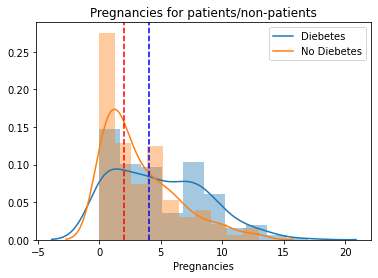

In [0]:
## patients with diabetes seem to have a normally distributed pregnancies times
sns.distplot(dbdata[dbdata['Outcome']==1]['Pregnancies'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['Pregnancies'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Pregnancies for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['Pregnancies']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['Pregnancies']),color='blue', linestyle='--')

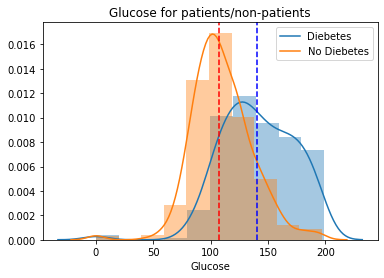

In [0]:
## Glucose level
sns.distplot(dbdata[dbdata['Outcome']==1]['Glucose'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['Glucose'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Glucose for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['Glucose']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['Glucose']),color='blue', linestyle='--')

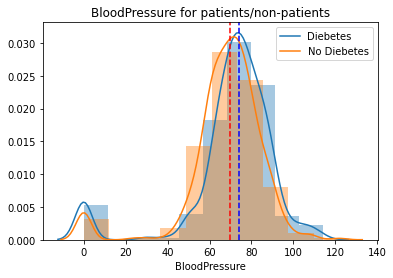

In [0]:
## BloodPressure
sns.distplot(dbdata[dbdata['Outcome']==1]['BloodPressure'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['BloodPressure'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('BloodPressure for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['BloodPressure']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['BloodPressure']),color='blue', linestyle='--')

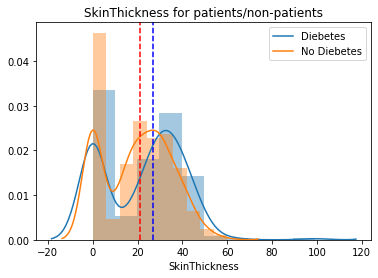

In [0]:
## SkinThickness
sns.distplot(dbdata[dbdata['Outcome']==1]['SkinThickness'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['SkinThickness'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('SkinThickness for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['SkinThickness']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['SkinThickness']),color='blue', linestyle='--')

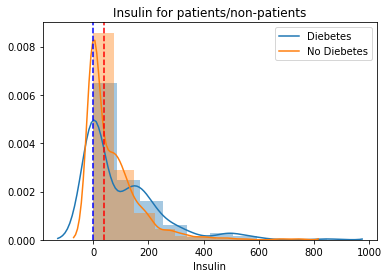

In [0]:
## Insulin
sns.distplot(dbdata[dbdata['Outcome']==1]['Insulin'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['Insulin'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Insulin for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['Insulin']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['Insulin']),color='blue', linestyle='--')

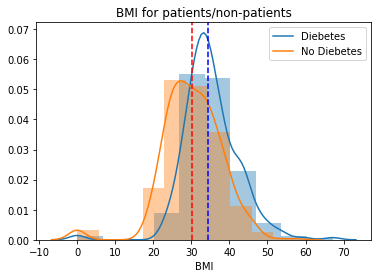

In [0]:
## BMI
sns.distplot(dbdata[dbdata['Outcome']==1]['BMI'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['BMI'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('BMI for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['BMI']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['BMI']),color='blue', linestyle='--')

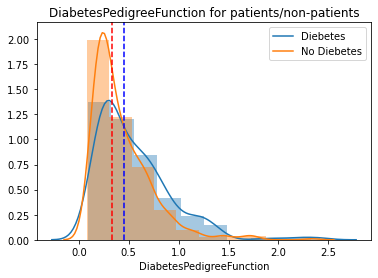

In [0]:
## DiabetesPedigreeFunction 
sns.distplot(dbdata[dbdata['Outcome']==1]['DiabetesPedigreeFunction'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['DiabetesPedigreeFunction'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('DiabetesPedigreeFunction for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['DiabetesPedigreeFunction']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['DiabetesPedigreeFunction']),color='blue', linestyle='--')

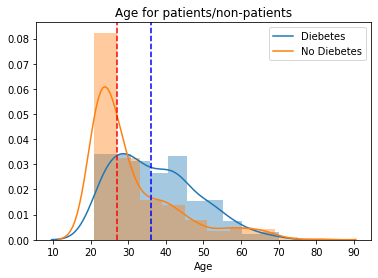

In [0]:
## Age 
sns.distplot(dbdata[dbdata['Outcome']==1]['Age'],bins=10,kde_kws={'label':'Diebetes'})
sns.distplot(dbdata[dbdata['Outcome']==0]['Age'],bins=10,kde_kws={'label':'No Diebetes'})
plt.title('Age for patients/non-patients')
plt.axvline(np.median(dbdata[dbdata['Outcome']==0]['Age']),color='red', linestyle='--')
plt.axvline(np.median(dbdata[dbdata['Outcome']==1]['Age']),color='blue', linestyle='--')

In [0]:
dbdata['Outcome'].value_counts()/len(dbdata)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Feature Engineering

##Prediction: Diabetes Diagnosis

### Standardize and split Tran Test Dataset 

In [0]:
#Define X, y variable Standardization 
y=dbdata.iloc[:,-1]
std = StandardScaler()                 # scale numeric columns
X = pd.DataFrame(std.fit_transform(dbdata.iloc[:,:-1]),columns=dbdata.iloc[:,:-1].columns)

In [0]:
#Split train test dataset
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.25, random_state=0)

### Define Functions for model and evaluation

**(confusion matrix, precision, recall, ROC AUC)**




In [0]:
def model_prediction(algorithm, X_train, X_test, y_train):
  algorithm_fit = algorithm.fit(X_train, y_train)
  predictions  = algorithm.predict(X_test)
  probabilities = algorithm.predict_proba(X_test)
  return algorithm_fit, predictions, probabilities

In [0]:
def prediction(algorithm, X_train, X_test, y_train, y_test) :
    
    # model prediction
    algorithm_fit, predictions, probabilities = model_prediction(algorithm, X_train, X_test, y_train)

    # print summary
    print ("\n Classification report : \n", classification_report(y_test, predictions))
    print ("Accuracy   Score : ", accuracy_score(y_test, predictions))

    # plot confusion matrix 
    plot_confusion_matrix(algorithm_fit, X_test, y_test, cmap=plt.cm.Blues,display_labels=['No Diabetes','Diabetes'])
    plt.title('Confusion Matrix')
    
    # plot roc curve
    plot_roc_curve(algorithm_fit, X_test, y_test)
    ax = plt.gca()
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
    plt.title('Receiver Operating Characteristic')
    

### Logistic Regression

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 197 out of 200 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished



 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

Accuracy   Score :  0.8020833333333334


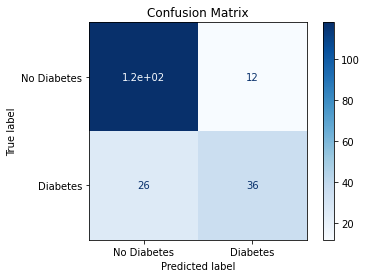

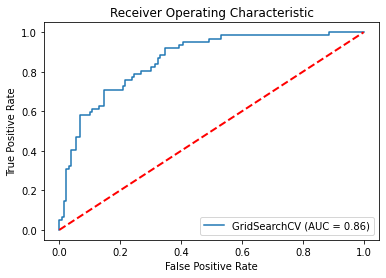

In [0]:
##logistic regression classifier with hyperparameter tuning using GridSearchCV
parameters = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)}
logit = GridSearchCV(LogisticRegression(random_state=0),parameters,cv = 5, verbose=True, n_jobs=-1)
prediction(logit,X_train, X_test, y_train, y_test)

Model Evaluation and Intepretation: 


### SVM -SVC

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.0s finished



 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.86       130
           1       0.76      0.60      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.77       192
weighted avg       0.80      0.81      0.80       192

Accuracy   Score :  0.8072916666666666


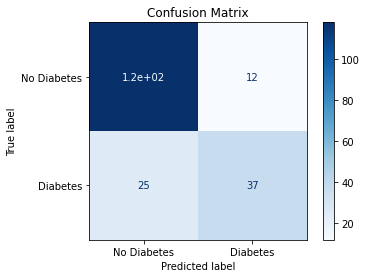

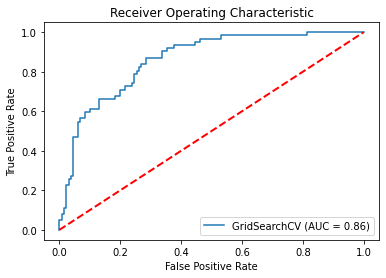

In [0]:
##svm classifer with hyperparameter tuning using GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = GridSearchCV(SVC(random_state=0,probability=True), parameters, cv = 5, verbose=True, n_jobs=-1)
prediction(svc,X_train, X_test, y_train, y_test)

### Random Forest

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  8.0min finished



 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.74      0.56      0.64        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192

Accuracy   Score :  0.796875


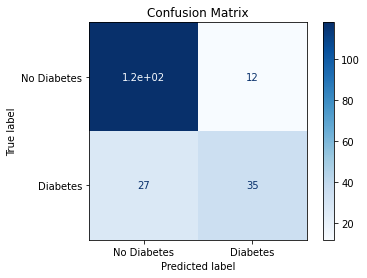

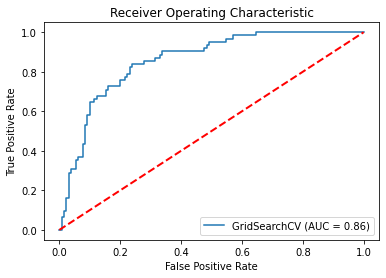

In [0]:
## random forest classifer with hyperparameter tuning using GridSearchCV
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = GridSearchCV(RandomForestClassifier(), parameters, cv = 3, n_jobs = -1, verbose = 2)
prediction(rf,X_train, X_test, y_train, y_test)

## Model Evaluation and Intepretation 

Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business impact viewpoint (false negatives vs false positives). (3 points)

**Classification Report** <br>
From the model classification report, we can see the accuracy rate of the model shows the overall rate of correctly predicted results or both true positive and true negatives out of all the predictions made. But it is not a good measure in this case because it gives equal importance to the false positives and false negatives. The data is imbalanced where patients data with only 35% with diabetes. Thus, correctly predicting no diabetes is of less use. 

**Confusion Matrix** <br>
The confusion matrix shows the predicted result on the test dataset using our trained model. 

**Precision vs Recall**<BR>
In this classification task where we would like to correctly predict the result of diabete diagnostic, the result of false negative is more severe than false positives because informing patients of no disease can result in delayed medical treatment and damage their health. Thus, we should give more emphasis to the metrics on the false negative rate, or the recall which is 
the proportion of correctly identified positive out of all actual positives. Precision here indicates the proportion of correctly predicted positive observations out of all predicted psitive indentifications which is of less importance than the recall because higher recall lead to more severe outcome on the patients. Based on the tuned model of Logistic Regression, Random Forest and Support Vector Machine, we can clearly see that the SVC model performace is better. Thus, we can use this trained model to predict the diabetes diagnostic in the future. 

**ROC-AUC**<BR>
The ROC-AUC curve shows the True positive rate versus the False positive rate curve for all the threshold values ranging from 0 to 1. In an ROC curve, each point in the ROC space is associated with a different confusion matrix. A diagnoal line from the bottom left to the top right represent we have at least 50% chance to correctly predict diabetes even if we are guess randomly. AUC shows how much the model is capable of distingushing between different classes. From the tuned model above, we can see that the three models have similar ROC curve meaning that the three models perform similar in terms of identify postive and negative diabetes diagnostics. 